In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt


In [2]:
k = 3
class cluster_node:
    def __init__(self, vec, id, left=None, right=None, distance=0.0, node_vector = None):
        self.leftnode = left
        self.rightnode = right
        self.vec = vec
        self.id = id
        self.distance = distance
        if node_vector is None:
            self.node_vector = [self.id]
        else:
            self.node_vector = node_vector[:]

def euclidean_distance(vec1, vec2):
    return np.sqrt(sum((vec1 - vec2) ** 2))

def min_distance(clust1, clust2, distances):
    d = 12123123123123
    for i in clust1.node_vector:
        for j in clust2.node_vector:
            try:
                distance = distances[(i,j)]
            except:
                try:
                    distance = distances[(j,i)]
                except:
                    distance = euclidean_distance(clust1.vec, clust2.vec)
            if distance < d:
                d = distance
    return d

def agglomerative_clustering(data, distance):
    # cluster the rows of the data matrix
    distances = {}
    currentclustid = -1

    # cluster nodes are initially just the individual rows
    nodes = [cluster_node(np.array(data[i]), id=i) for i in range(len(data))]

    while len(nodes) > k:
        lowestpair = (0,1)
        closest = euclidean_distance(nodes[0].vec,nodes[1].vec)

        # loop through every pair looking for the smallest distance
        for i in range(len(nodes)):
            for j in range(i+1,len(nodes)):
                # distances is the cache of distance calculations
                if (nodes[i].id,nodes[j].id) not in distances:
                    if distance == "min":
                        distances[(nodes[i].id,nodes[j].id)] = min_distance(nodes[i], nodes[j], distances)
                    else:
                        distances[(nodes[i].id,nodes[j].id)] = euclidean_distance(nodes[i].vec,nodes[j].vec)

                d = distances[(nodes[i].id,nodes[j].id)]

                if d < closest:
                    closest = d
                    lowestpair = (i,j)

        # calculate the average of the two nodes
        len0 = len(nodes[lowestpair[0]].node_vector)
        len1 = len(nodes[lowestpair[1]].node_vector)
        mean_vector = [(len0*nodes[lowestpair[0]].vec[i] + len1*nodes[lowestpair[1]].vec[i])/(len0 + len1) \
                        for i in range(len(nodes[0].vec))]

        # create the new cluster node
        new_node = cluster_node(np.array(mean_vector), currentclustid, left = nodes[lowestpair[0]], right = nodes[lowestpair[1]], \
            distance = closest, node_vector = nodes[lowestpair[0]].node_vector + nodes[lowestpair[1]].node_vector)

        # cluster ids that weren't in the original set are negative
        currentclustid -= 1
        del nodes[lowestpair[1]]
        del nodes[lowestpair[0]]
        nodes.append(new_node)

    return nodes

In [3]:
df=pd.read_csv("iris.csv")
df.head(20)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
X = df.iloc[:, [0,1,2,3]]
data=np.array(X)

In [6]:
print(X)

     SepalLength  SepalWidth  PetalLength  PetalWidth
0            5.1         3.5          1.4         0.2
1            4.9         3.0          1.4         0.2
2            4.7         3.2          1.3         0.2
3            4.6         3.1          1.5         0.2
4            5.0         3.6          1.4         0.2
..           ...         ...          ...         ...
145          6.7         3.0          5.2         2.3
146          6.3         2.5          5.0         1.9
147          6.5         3.0          5.2         2.0
148          6.2         3.4          5.4         2.3
149          5.9         3.0          5.1         1.8

[150 rows x 4 columns]


In [11]:
cluster = agglomerative_clustering(data, "avg")

C:\Users\varta\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


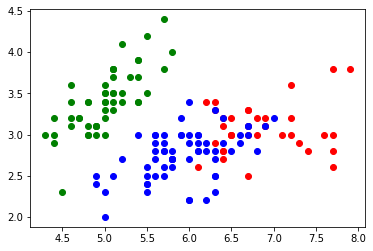

In [15]:
j = 0
colorset = ['red', 'green', 'blue', 'yellow', 'brown', 'orange', 'black']
m = plt.figure(2)
for i in cluster:
    plt.scatter(data[i.node_vector].T[0], data[i.node_vector].T[1], color = colorset[j])
    j += 1
m.show()